---
title: Matt Viana
description: DS 220
date: 12/7/2023'
echo: false
---


# Correlation of wages in different education levels and Consumer Price Index from 2000 to 2022

It has been in the public eye that the cost of living has dramatically increased in the last 20 years. For the purpose of enriching my data analytical skills and knowledge of relevant issues for a student about to enter the workforce, I decided to track two metrics of cost of living.  The analysis of trends in wages distributed by differences in levels of education, in addition to the inflation rates since the year 2000 provides an important base case representative of the value of money for working Americans. This analysis holds significant importance due to its direct impact on standards of living, income distribution, and overall economic health. The motivation behind this study stems from the need to comprehend the evolving relationship between education, wages, and inflation, which serves as a pivotal aspect in shaping socioeconomic policies and guiding investments.

The focus of this analytical project is on two datasets. US Inflation Dataset (1947 - 2023) where we will be surveying Consumer Price Index (CPI) variations, and Hourly Wages by Education in the USA (1973-2022) from 2000 - 2022. By correlating a significant and relevant span year over year, it enables the creation of data models that display economic trends. Using these models, we aim to answer the following questions:

How much have wages increased in the measured timeframe?

Have wages changed consistently across the different levels of education?  

How much has the CPI risen in the measured timeframe?	

Has there been a consistent relationship between the CPI and wage growth over the past two decades?

What is the difference in purchasing power in 2000 to 2022 based on education levels?

Which levels of education have shown the strongest correlation between wage changes and CPI variations since 2000?

What are relevant trends displayed?

The correlation between education and wages has long been established, yet the intricate nuances within this relationship, especially in the context of fluctuating economic conditions represented by inflation, remain a personal curiosity of mine. This exploration delves into the changes in wage differentials across various education levels over the past two decades, considering the overarching influence of inflationary pressures on these earning differentials.


## Recognizing the Criteria
Key concepts to be explored include the influence of education levels on wage disparities, tracking individuals under these categories: Less than a High School diploma, High School, College Degree, Bachelors Degree, and Advanced Degree.  

CPI is calculated based on a predetermined basket of goods and services commonly purchased by urban consumers. This basket represents various categories like housing, food, transportation, education, healthcare, and entertainment. For the analyzed data set the information was measured by the Federal Reserve Economic Data (FRED), Federal Reserve Bank of St. Louis. For this paper, the base CPI used to track percentages is 2000-01-01, with a calculated CPI of 169.3. This means a CPI of 200 represents approximately an 18.13% increase from the base.

Leveraging the capabilities of Python's Pandas library as a statistical tool has provided a robust framework for data manipulation, analysis, and visualization. This comprehensive approach explores the interactions between Consumer Price Index variations and wage trends across different educational backgrounds. By delineating these criteria, we've established a foundational understanding of the questions at hand.

Surveying the data an obvious starting point when pursuing this analysis was determining the most basic metrics provided by the data. Looking at the wage data, mapping the change in income over time for each category shows the increase over the years and the difference between categories.  

In [1]:
## Reading and Cleaning the data
import pandas as pd
import matplotlib.pyplot as plt


CPI = pd.read_csv("US_inflation_rates.csv")
wages = pd.read_csv("wages_by_education.csv")

#Clean Data, remove duplicates and empty rows
CPI = CPI.dropna()
wages = wages[::-1]
wages = wages.dropna()
wages = wages.drop_duplicates()

# Limited the data from the year 2000 to 2022
CPI = CPI[CPI['value'] > 169.3]
CPI = CPI[CPI['value'] < 298.99]
CPI['date'] = pd.to_datetime(CPI['date'])

wages = wages[wages['year'] > 1999]
wages = wages.iloc[:, :6]


wage_years = wages['year']
wages_noYear = wages.drop(columns='year')

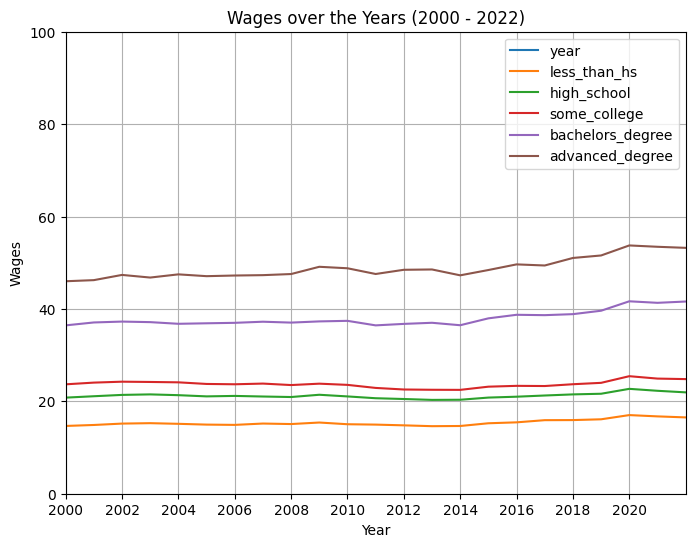

In [2]:
# Plotting line graph 1
plt.figure(figsize=(8, 6))
for column in wages.columns:
    plt.plot(wage_years, wages[column], label=column)

plt.xlabel('Year')
plt.ylabel('Wages')
plt.title('Wages over the Years (2000 - 2022)')
plt.legend()
plt.grid(True)
plt.xlim(2000, 2022)  
plt.ylim(0, 100)
plt.xticks(range(2000, 2022, 2))
plt.show()

In [3]:
# Making Table
statistics_per_column = {}
for column in wages_noYear.columns:
    min_value = wages_noYear[column].min()
    max_value = wages_noYear[column].max()
    yearly_change = wages_noYear[column].diff().mean()
    wage_total_percent_increase = ((max_value - min_value) / min_value) * 100 if min_value != 0 else 0
    yearly_change_percent = ((yearly_change/min_value) * 100)

    statistics_per_column[column] = {
        'Min': round(min_value, 2),
        'Max': round(max_value, 2),
        'Average Change Over Year': round(yearly_change, 2),
        'Average Percent Change Over Year':f"{round(yearly_change_percent, 2)}%",
        'Total Percent Increase': f"{round(wage_total_percent_increase, 2)}%"
    }

statistics_df = pd.DataFrame.from_dict(statistics_per_column, orient='columns')
print(statistics_df)

                                 less_than_hs high_school some_college  \
Min                                     14.62       20.31        22.48   
Max                                     17.02        22.7        25.44   
Average Change Over Year                 0.08        0.05         0.05   
Average Percent Change Over Year        0.58%       0.26%        0.23%   
Total Percent Increase                 16.42%      11.77%       13.17%   

                                 bachelors_degree advanced_degree  
Min                                         36.44           45.99  
Max                                         41.65           53.74  
Average Change Over Year                     0.23            0.33  
Average Percent Change Over Year            0.64%           0.71%  
Total Percent Increase                      14.3%          16.85%  


It is immediately visible that the wage increases are stagnant, and that the differences between individuals with less than a high school diploma, individuals with a high school diploma, and those who have completed a college diploma are not significant. Whereas, those who completed a bachelor see a significant pay increase, which stands equally as true for those who have some advanced degree. Even so, the total percent increase per category is close to consistent across the board. One noticeable difference is that there is less of a variation between those with no High School diploma and those with a High School diploma in 2022.

The second basic metric was to graph the changes in CPI per year. Graphing this data allows us to better visualize the changes that a person working and living through those years would experience. The day-to-day, or even, year-to-year changes are small; however, when mapping on a large scale a pattern of small changes becomes a significant outline.

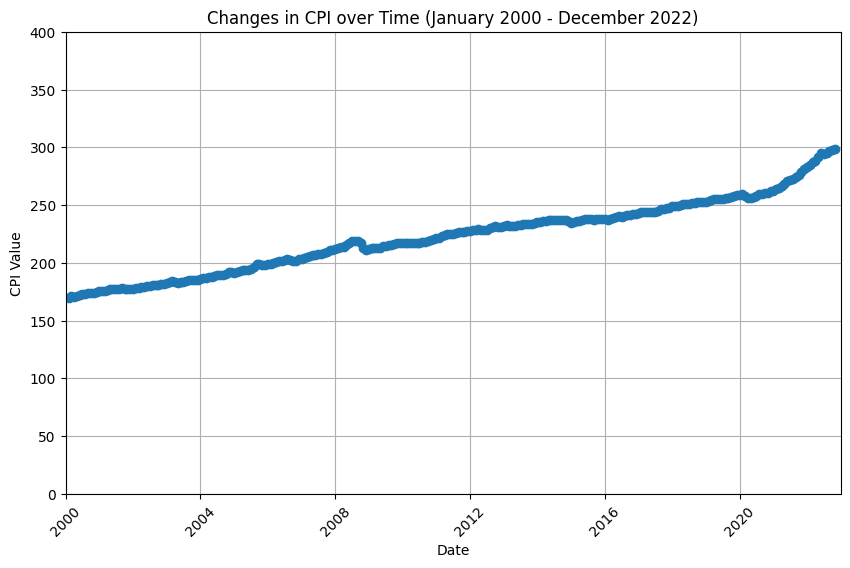

In [4]:
# Plotting line graph 2 
CPI['date'] = pd.to_datetime(CPI['date'])

plt.figure(figsize=(10, 6))
plt.plot(CPI['date'], CPI['value'], marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('CPI Value')
plt.title('Changes in CPI over Time (January 2000 - December 2022)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x axis
plt.grid(True)
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2022-12-31'))
plt.ylim(0, 400)
plt.show()

In [5]:
# Calculate statistics
CPI['yearly_change'] = CPI['value'].diff() 
average_change = CPI['yearly_change'].mean() 
average_change = average_change * 12
min_value = CPI['value'].min()
max_value = CPI['value'].max()
total_change_percent = ((max_value - min_value) / min_value) * 100
CPI_yearly_change_percent = ((average_change/min_value) * 100)


statistics_table2 = {
    'Min': round(CPI['value'].min(), 2),
    'Max': round(CPI['value'].max(), 2),
    'Average Change Over Year': round(average_change, 2),
    'Average Percent Change Over Year':f"{round(CPI_yearly_change_percent, 2)}%",
    "Total Percent Increase" : f"{round(total_change_percent)}%"

}

# Table
table2 = pd.DataFrame.from_dict(statistics_table2, orient='index', columns=['Values'])
print(table2)

                                 Values
Min                               170.0
Max                               298.6
Average Change Over Year           5.65
Average Percent Change Over Year  3.33%
Total Percent Increase              76%


After creating the data frames and table, it is easily visible that the Consumer Price Index changes at an average of 3.33% a year, for a total of 76%. A staggering increase compared to the average wage increase year over year. The inability of wages to keep up with inflation can lead to a decrease in the standard of living for affected individuals or households. They may have to allocate more of their income towards essentials like housing, food, and healthcare, leaving less for savings or discretionary spending. 

This scenario can lead to financial stress, especially for those on fixed incomes or with limited opportunities for wage increases. It might force individuals to cut back on non-essential expenses or seek additional sources of income to maintain their previous standard of living. A frightening outlook on the future. What is obvious when looking at both of these data visualizations is that they have little variation year over year, leading me to predict that this pattern will likely remain constant.

On the question of whether or not there has been a consistent relationship between the CPI and wage growth over the past two decades, I decided to plot the percentage increase yearly for all of the tracked metrics in this paper. The following graph represents the data visible in the tables. It enables the visualization of how daunting the differences have been.


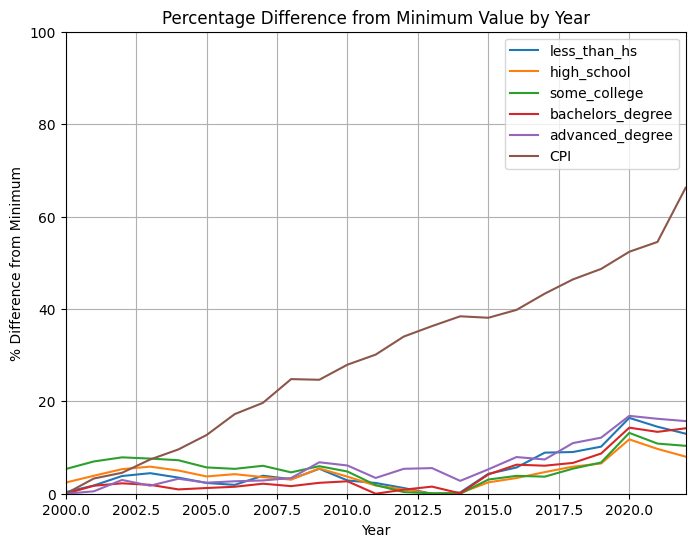

In [6]:

# Merging data
CPI['date'] = pd.to_datetime(CPI['date'])
CPI_yearly = CPI.groupby(CPI['date'].dt.year).first()
CPI_yearly.index.name = 'year'
CPI_yearly.reset_index(inplace=True)

CPI_values = CPI_yearly['value']
wages_with_CPI = wages.join(CPI_values, how='inner')
wages_with_CPI['value'] = wages_with_CPI['value'].iloc[::-1]

# Calculate the percentage diff
wages_with_CPI['value'] = wages_with_CPI['value'].values[::-1]
wages_with_CPI = wages_with_CPI.rename(columns={'value': 'CPI'})

# Calculate the percentage diff
percentage_diff = wages_with_CPI.drop('year', axis=1).apply(lambda x: ((x - x.min()) / x.min()) * 100)

plt.figure(figsize=(8, 6))

# Plotting the percentage difference for each column
for column in percentage_diff.columns:
    if column != 'year':  
        plt.plot(wages_with_CPI['year'], percentage_diff[column], label=column)

plt.xlabel('Year')
plt.ylabel('% Difference from Minimum')
plt.title('Percentage Difference from Minimum Value by Year')
plt.ylim(0, 100)
plt.xlim(2000, 2022)
plt.legend()
plt.grid(True)
plt.show()

Next, I inquired about the difference in purchasing power in 2000 to 2022 based on education levels. My method was dividing income by CPI. To do so I first multiplied every income by 2000 hours, an estimation of full-time pay based on the following assumptions: Weekly Hours × Weeks Worked per Year=Annual Hours Worked. 40 hours/week × 50 weeks/year = 2000 hours/year.  


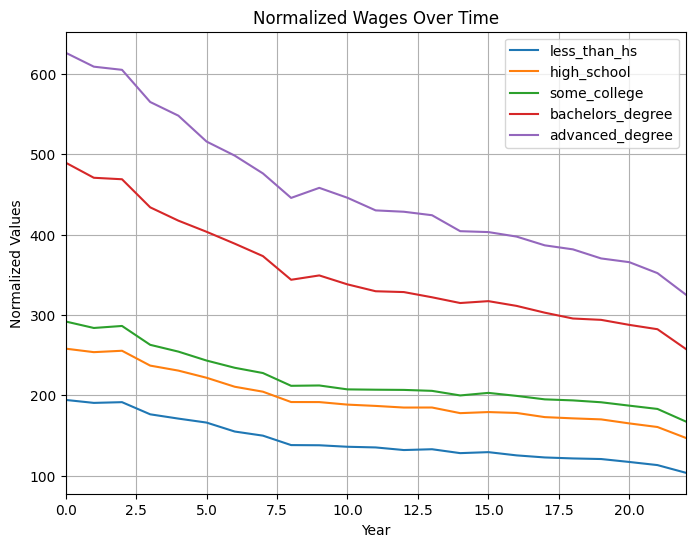

In [7]:
columns_to_multiply = ['less_than_hs', 'high_school', 'some_college', 'bachelors_degree', 'advanced_degree']

# Multiplying selected columns by 2000
wages_with_CPI[columns_to_multiply] *= 2000

wagesYear = wages_with_CPI.join(CPI_values, how='inner')

# Dividing wage columns by 'CPI'
wagesYear_normalized = wagesYear[columns_to_multiply].div(wagesYear['value'], axis=0)

plt.figure(figsize=(8, 6))

for column in wagesYear_normalized.columns:
    plt.plot(wagesYear.index, wagesYear_normalized[column], label=column)

plt.xlabel('Year')
plt.ylabel('Normalized Values')
plt.title('Normalized Wages Over Time')
plt.xlim(0, 22)
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Last table
statistics_per_column = {}
for column in wagesYear_normalized.columns:
    min_value = wagesYear_normalized[column].min()
    max_value = wagesYear_normalized[column].max()
    yearly_change = wagesYear_normalized[column].diff().mean()
    wage_total_percent_increase = ((max_value - min_value) / min_value) * 100 if min_value != 0 else 0
    yearly_change_percent = ((yearly_change/min_value) * 100)

    statistics_per_column[column] = {
        'Min': round(min_value, 2),
        'Max': round(max_value, 2),
        'Average Change Over Year': round(yearly_change, 2),
        'Average Percent Change Over Year':f"{round(yearly_change_percent, 2)}%",
        'Total Percent Change': f"{round(wage_total_percent_increase, 2)}%"
    }

statistics_df = pd.DataFrame.from_dict(statistics_per_column, orient='columns')
print(statistics_df)

                                 less_than_hs high_school some_college  \
Min                                    103.82      147.21       167.59   
Max                                    194.35      258.12       291.88   
Average Change Over Year                 4.12        5.04         5.65   
Average Percent Change Over Year        3.96%       3.42%        3.37%   
Total Percent Change                    87.2%      75.35%       74.17%   

                                 bachelors_degree advanced_degree  
Min                                        257.89          325.48  
Max                                        489.41          626.12  
Average Change Over Year                    10.52           13.67  
Average Percent Change Over Year            4.08%            4.2%  
Total Percent Change                       89.77%          92.37%  


As we can see from the table, the average divergence at the end of the twenty-two-year period was 83.77%. This means an average individual's purchasing power would translate to every 100 dollars earned today being worth 183.77 dollars in the year 2000.

To answer my question “Which levels of education have shown the strongest correlation between wage changes and CPI variations since 2000?” it seems to be that having a college none-bachelors degree is the smallest difference in purchasing power. With that said, no education level had any meaningful correlation to CPI.

The trends analyzed today are consistent. Wages have on average increased by around 4 dollars an hour, while the Consumer Price Index has changed by 128 points approximately.


## Final Thoughts 
Throughout this analysis, we delved into the intricate dynamics between CPI variations and wage fluctuations across different educational strata from 2000 to 2022. Utilizing statistical analysis, primarily employing Python's Pandas library, we uncovered compelling insights into the impact of inflation on purchasing power and income disparities.

Our findings highlighted a discernible disparity in the adjustment of wages across educational levels in response to CPI changes. It became evident that while certain sectors or educational groups showcased minor resilience to CPI fluctuations, they all experienced disproportionate impacts on real wages.

The data underscored the crucial role education plays in buffering individuals by providing higher wages; despite not being indicative of correlation to CPI. However, disparities persisted, revealing the need for targeted interventions to mitigate income inequalities stemming from CPI variations.

Our analysis elucidated the nuanced interplay between CPI, wage adjustments, and their implications for economic policies and societal well-being. The inability of wages to consistently keep pace with CPI growth underscored the challenges individuals face in maintaining purchasing power and sustaining their standard of living.

Moving forward, these findings prompt a reconsideration of policy frameworks aimed at addressing wage stagnation, bolstering educational opportunities, and ensuring a more equitable distribution of income. Furthermore, this analysis puts into evidence the need for further research into the multifaceted relationship between inflation, education, and income dynamics, paving the way for more informed economic strategies and social policies.

## Works Cited

Asaniczka. “Wages by Education in the USA (1973-2022).” Kaggle, 5 Dec. 2023, 
    www.kaggle.com/datasets/asaniczka/wages-by-education-in-the-usa-1973-2022.

Narne, Pavan. “US Inflation Dataset (1947 - 2023).” Kaggle, 30 July 2023, 
    www.kaggle.com/datasets/pavankrishnanarne/us-inflation-dataset-1947-present. 

## Code Apendix

                                 less_than_hs high_school some_college  \
Min                                     14.62       20.31        22.48   
Max                                     17.02        22.7        25.44   
Average Change Over Year                 0.08        0.05         0.05   
Average Percent Change Over Year        0.58%       0.26%        0.23%   
Total Percent Increase                 16.42%      11.77%       13.17%   

                                 bachelors_degree advanced_degree  
Min                                         36.44           45.99  
Max                                         41.65           53.74  
Average Change Over Year                     0.23            0.33  
Average Percent Change Over Year            0.64%           0.71%  
Total Percent Increase                      14.3%          16.85%  
                                 Values
Min                               170.0
Max                               298.6
Average Change Over Year   

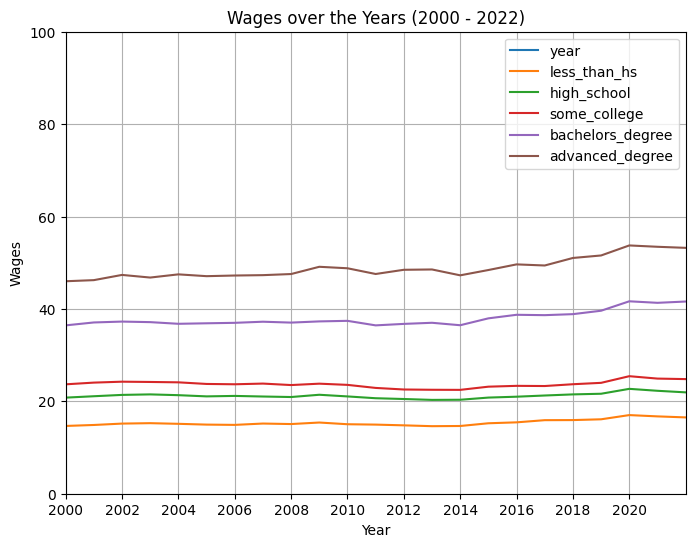

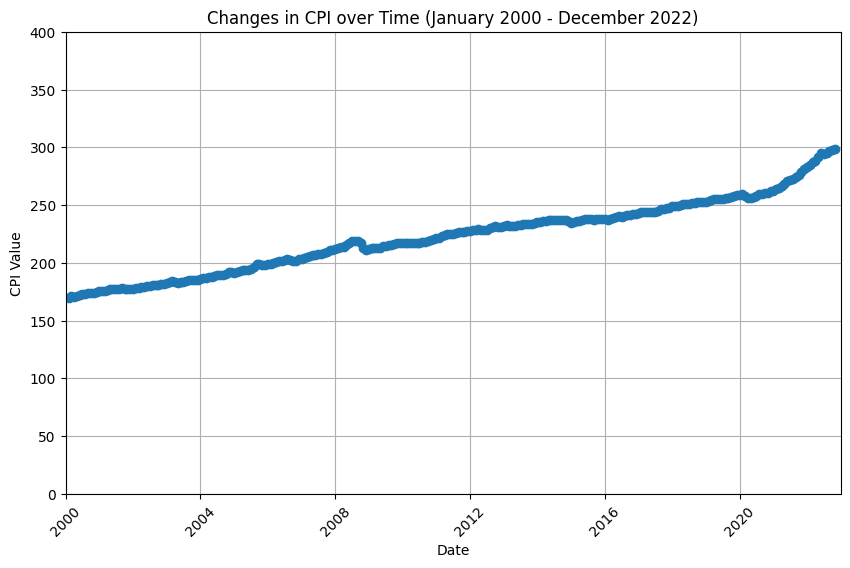

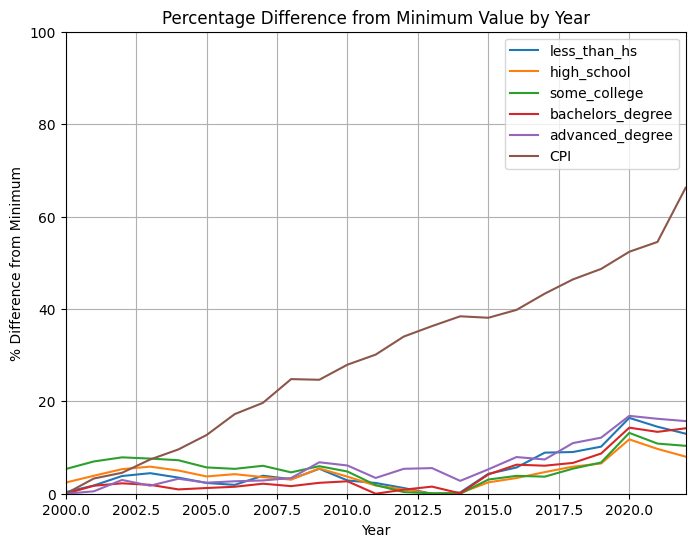

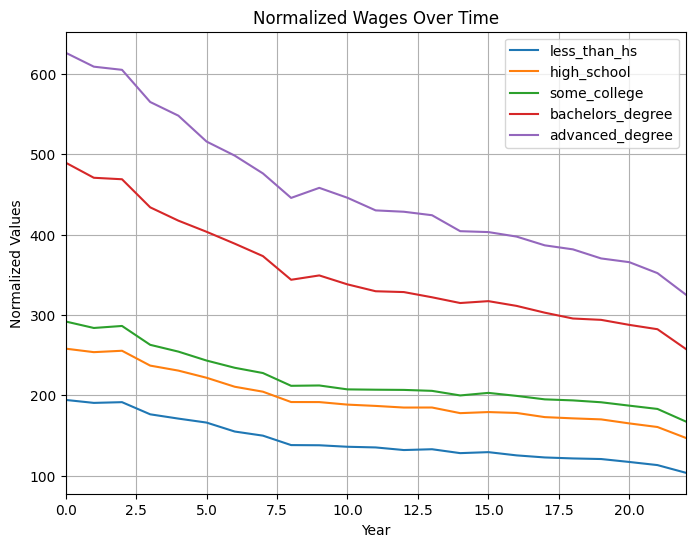

                                 less_than_hs high_school some_college  \
Min                                    103.82      147.21       167.59   
Max                                    194.35      258.12       291.88   
Average Change Over Year                 4.12        5.04         5.65   
Average Percent Change Over Year        3.96%       3.42%        3.37%   
Total Percent Change                    87.2%      75.35%       74.17%   

                                 bachelors_degree advanced_degree  
Min                                        257.89          325.48  
Max                                        489.41          626.12  
Average Change Over Year                    10.52           13.67  
Average Percent Change Over Year            4.08%            4.2%  
Total Percent Change                       89.77%          92.37%  


In [9]:
## Reading and Cleaning the data

import pandas as pd
import matplotlib.pyplot as plt


CPI = pd.read_csv("US_inflation_rates.csv")
wages = pd.read_csv("wages_by_education.csv")

#Clean Data
CPI = CPI.dropna()
wages = wages[::-1]
wages = wages.dropna()
wages = wages.drop_duplicates()

CPI = CPI[CPI['value'] > 169.3]
CPI = CPI[CPI['value'] < 298.99]
CPI['date'] = pd.to_datetime(CPI['date'])

wages = wages[wages['year'] > 1999]
wages = wages.iloc[:, :6]


wage_years = wages['year']
wages_noYear = wages.drop(columns='year') 


# Plotting line graph 1
plt.figure(figsize=(8, 6))
for column in wages.columns:
    plt.plot(wage_years, wages[column], label=column)

plt.xlabel('Year')
plt.ylabel('Wages')
plt.title('Wages over the Years (2000 - 2022)')
plt.legend()
plt.grid(True)
plt.xlim(2000, 2022)  
plt.ylim(0, 100)
plt.xticks(range(2000, 2022, 2))
#plt.show()

# Making Table
statistics_per_column = {}
for column in wages_noYear.columns:
    min_value = wages_noYear[column].min()
    max_value = wages_noYear[column].max()
    yearly_change = wages_noYear[column].diff().mean()
    wage_total_percent_increase = ((max_value - min_value) / min_value) * 100 if min_value != 0 else 0
    yearly_change_percent = ((yearly_change/min_value) * 100)

    statistics_per_column[column] = {
        'Min': round(min_value, 2),
        'Max': round(max_value, 2),
        'Average Change Over Year': round(yearly_change, 2),
        'Average Percent Change Over Year':f"{round(yearly_change_percent, 2)}%",
        'Total Percent Increase': f"{round(wage_total_percent_increase, 2)}%"
    }

statistics_df = pd.DataFrame.from_dict(statistics_per_column, orient='columns')
print(statistics_df)

# Plotting line graph 2 
CPI['date'] = pd.to_datetime(CPI['date'])

plt.figure(figsize=(10, 6))
plt.plot(CPI['date'], CPI['value'], marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('CPI Value')
plt.title('Changes in CPI over Time (January 2000 - December 2022)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x axis
plt.grid(True)
plt.xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2022-12-31'))
plt.ylim(0, 400)
#plt.show()

# Calculate statistics
CPI['yearly_change'] = CPI['value'].diff() 
average_change = CPI['yearly_change'].mean() 
average_change = average_change * 12
min_value = CPI['value'].min()
max_value = CPI['value'].max()
total_change_percent = ((max_value - min_value) / min_value) * 100
CPI_yearly_change_percent = ((average_change/min_value) * 100)


statistics_table2 = {
    'Min': round(CPI['value'].min(), 2),
    'Max': round(CPI['value'].max(), 2),
    'Average Change Over Year': round(average_change, 2),
    'Average Percent Change Over Year':f"{round(CPI_yearly_change_percent, 2)}%",
    "Total Percent Increase" : f"{round(total_change_percent)}%"

}

# Table
table2 = pd.DataFrame.from_dict(statistics_table2, orient='index', columns=['Values'])
print(table2)


# Merging data
CPI['date'] = pd.to_datetime(CPI['date'])
CPI_yearly = CPI.groupby(CPI['date'].dt.year).first()
CPI_yearly.index.name = 'year'
CPI_yearly.reset_index(inplace=True)

CPI_values = CPI_yearly['value']
wages_with_CPI = wages.join(CPI_values, how='inner')
wages_with_CPI['value'] = wages_with_CPI['value'].iloc[::-1]

# Calculate the percentage diff
wages_with_CPI['value'] = wages_with_CPI['value'].values[::-1]
wages_with_CPI = wages_with_CPI.rename(columns={'value': 'CPI'})

# Calculate the percentage diff
percentage_diff = wages_with_CPI.drop('year', axis=1).apply(lambda x: ((x - x.min()) / x.min()) * 100)

plt.figure(figsize=(8, 6))

# Plotting the percentage difference for each column
for column in percentage_diff.columns:
    if column != 'year':  
        plt.plot(wages_with_CPI['year'], percentage_diff[column], label=column)

plt.xlabel('Year')
plt.ylabel('% Difference from Minimum')
plt.title('Percentage Difference from Minimum Value by Year')
plt.ylim(0, 100)
plt.xlim(2000, 2022)
plt.legend()
plt.grid(True)
#plt.show()


columns_to_multiply = ['less_than_hs', 'high_school', 'some_college', 'bachelors_degree', 'advanced_degree']

# Multiplying selected columns by 2000
wages_with_CPI[columns_to_multiply] *= 2000

wagesYear = wages_with_CPI.join(CPI_values, how='inner')

# Dividing wage columns by 'CPI'
wagesYear_normalized = wagesYear[columns_to_multiply].div(wagesYear['value'], axis=0)

plt.figure(figsize=(8, 6))

for column in wagesYear_normalized.columns:
    plt.plot(wagesYear.index, wagesYear_normalized[column], label=column)

plt.xlabel('Year')
plt.ylabel('Normalized Values')
plt.title('Normalized Wages Over Time')
plt.xlim(0, 22)
plt.legend()
plt.grid(True)
plt.show()

# Last table
statistics_per_column = {}
for column in wagesYear_normalized.columns:
    min_value = wagesYear_normalized[column].min()
    max_value = wagesYear_normalized[column].max()
    yearly_change = wagesYear_normalized[column].diff().mean()
    wage_total_percent_increase = ((max_value - min_value) / min_value) * 100 if min_value != 0 else 0
    yearly_change_percent = ((yearly_change/min_value) * 100)

    statistics_per_column[column] = {
        'Min': round(min_value, 2),
        'Max': round(max_value, 2),
        'Average Change Over Year': round(yearly_change, 2),
        'Average Percent Change Over Year':f"{round(yearly_change_percent, 2)}%",
        'Total Percent Change': f"{round(wage_total_percent_increase, 2)}%"
    }

statistics_df = pd.DataFrame.from_dict(statistics_per_column, orient='columns')
print(statistics_df)
